### SHAP

In [41]:
import numpy as np
import pandas as pd
import joblib
import shap
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

Mircea's raw test data for shallow models:

oops never mind, different scikit-learn versions cause this to not work

In [49]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# make sure this all matches his
RANDOM_STATE = 42

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).astype(int)

if "SeniorCitizen" in df.columns:
    df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

df[["Churn"]].value_counts()


y = df["Churn"]
X = df.drop(columns=["Churn"])

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=RANDOM_STATE
)

# in case this is pissing me off too much
X_test.to_csv("./results/X_test_raw.csv", index=False)
y_test.to_csv("./results/y_test.csv", index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
# Load exported data
shap_values = np.load("./results/shap_values_shallow.npy")
shap_expected = np.load("./results/shap_expected_shallow.npy")
feature_names = pd.read_csv("./results/shap_feature_names_shallow.csv").iloc[:,0].tolist()
X_test_raw = pd.read_csv("./results/shap_X_test_raw.csv")

# Reconstruct SHAP object
shap_obj = shap.Explanation(
    values=shap_values,
    base_values=shap_expected,
    data=X_test_raw.values,
    feature_names=feature_names
)

# Plot
shap.summary_plot(shap_obj.values, shap_obj.data, feature_names=feature_names)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
# Load preprocessed arrays for FFNN
X_test_nn = np.load("./results/X_test_preprocessed_nn.npy")
y_test_nn = np.load("./results/y_test_nn.npy")

# Load models
logreg = joblib.load("./results/logreg_final.pkl")
svc = joblib.load("./results/svc_final.pkl")
dt = joblib.load("./results/decision_tree_final.pkl")
nb = joblib.load("./results/gaussian_naive_bayes_final.pkl")
xgb_model = joblib.load("./results/xgboost_final.pkl")

ffnn = load_model("./results/best_ffnn_model.keras")
ffnn_encoded = load_model("./results/best_ffnn_encoded_model.keras")
encoder = load_model("./results/encoder_model.keras")


/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.12/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.7.0 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.12/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/py

In [48]:
results = {
    "LogReg": evaluate_model(logreg, X_test_raw, y_test),
    "SVC": evaluate_model(svc, X_test_raw, y_test),
    "DecisionTree": evaluate_model(dt, X_test_raw, y_test),
    "NaiveBayes": evaluate_model(nb, X_test_raw, y_test),
    "XGBoost": evaluate_model(xgb_model, X_test_raw, y_test),
}


AttributeError: 'SimpleImputer' object has no attribute '_fill_dtype'

In [17]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import xgboost as xgb

X_train = np.load("./results/X_train_preprocessed.npy", allow_pickle=True)
X_test = np.load("./results/X_test_preprocessed.npy", allow_pickle=True)
y_train = np.load("./results/y_train.npy", allow_pickle=True)
y_test = np.load("./results/y_test.npy", allow_pickle=True)

X_train_nn = np.load("./results/X_train_preprocessed_nn.npy", allow_pickle=True)
X_test_nn = np.load("./results/X_test_preprocessed_nn.npy", allow_pickle=True)
y_train_nn = np.load("./results/y_train_nn.npy", allow_pickle=True)
y_test_nn = np.load("./results/y_test_nn.npy", allow_pickle=True)

# preprocessor = joblib.load("./results/preprocessor_nn.pkl")

rf = joblib.load("./results/random_forest_final.pkl")
logreg = joblib.load("./results/logreg_final.pkl")
svc = joblib.load("./results/svc_final.pkl")
dt = joblib.load("./results/decision_tree_final.pkl")
nb = joblib.load("./results/gaussian_naive_bayes_final.pkl")
xgb_model = joblib.load("./results/xgboost_final.pkl")

ffnn = load_model("./results/best_ffnn_model.keras")
ffnn_encoded = load_model("./results/best_ffnn_encoded_model.keras")
encoder = load_model("./results/encoder_model.keras")


/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.12/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.7.0 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.12/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/py

In [20]:
print(logreg)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'

gotta pass a dataframe with column names

shallow

In [ ]:
def shap_pipeline(model, X_df, model_name):
    print(f"Running SHAP for {model_name} (pipeline)...")
    explainer = shap.Explainer(model)  # model is a Pipeline
    shap_values = explainer(X_df)
    shap.summary_plot(shap_values, X_df, show=False)


ffnn and ae

In [52]:
print(ffnn.input_shape)
print(ffnn.output_shape)
print("X_test_nn shape:", X_test_nn.shape)

(None, 46)
(None, 1)
X_test_nn shape: (1407, 46)


binary sigmoid

Running SHAP for FFNN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


  2%|▏         | 1/50 [00:00<00:11,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


  4%|▍         | 2/50 [00:00<00:09,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


  6%|▌         | 3/50 [00:00<00:09,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


  8%|▊         | 4/50 [00:00<00:08,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


 10%|█         | 5/50 [00:00<00:08,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


 12%|█▏        | 6/50 [00:01<00:08,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


 14%|█▍        | 7/50 [00:01<00:07,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


 16%|█▌        | 8/50 [00:01<00:07,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


 18%|█▊        | 9/50 [00:01<00:07,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


 20%|██        | 10/50 [00:01<00:07,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


 22%|██▏       | 11/50 [00:02<00:06,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


 24%|██▍       | 12/50 [00:02<00:06,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


 26%|██▌       | 13/50 [00:02<00:06,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


 28%|██▊       | 14/50 [00:02<00:06,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


 30%|███       | 15/50 [00:02<00:06,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 32%|███▏      | 16/50 [00:02<00:06,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


 34%|███▍      | 17/50 [00:03<00:05,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


 36%|███▌      | 18/50 [00:03<00:05,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


 38%|███▊      | 19/50 [00:03<00:05,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 40%|████      | 20/50 [00:03<00:05,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


 42%|████▏     | 21/50 [00:03<00:05,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


 44%|████▍     | 22/50 [00:03<00:04,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 46%|████▌     | 23/50 [00:04<00:04,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


 48%|████▊     | 24/50 [00:04<00:04,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


 50%|█████     | 25/50 [00:04<00:04,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


 52%|█████▏    | 26/50 [00:04<00:04,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


 54%|█████▍    | 27/50 [00:04<00:04,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


 56%|█████▌    | 28/50 [00:05<00:03,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


 58%|█████▊    | 29/50 [00:05<00:03,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step


 60%|██████    | 30/50 [00:05<00:03,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


 62%|██████▏   | 31/50 [00:05<00:03,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


 64%|██████▍   | 32/50 [00:05<00:03,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


 66%|██████▌   | 33/50 [00:05<00:02,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 68%|██████▊   | 34/50 [00:06<00:02,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


 70%|███████   | 35/50 [00:06<00:02,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


 72%|███████▏  | 36/50 [00:06<00:02,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


 74%|███████▍  | 37/50 [00:06<00:02,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


 76%|███████▌  | 38/50 [00:06<00:02,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


 78%|███████▊  | 39/50 [00:07<00:01,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 80%|████████  | 40/50 [00:07<00:01,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


 82%|████████▏ | 41/50 [00:07<00:01,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 84%|████████▍ | 42/50 [00:07<00:01,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


 86%|████████▌ | 43/50 [00:07<00:01,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


 88%|████████▊ | 44/50 [00:07<00:01,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step


 90%|█████████ | 45/50 [00:08<00:00,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


 92%|█████████▏| 46/50 [00:08<00:00,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


 94%|█████████▍| 47/50 [00:08<00:00,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


 96%|█████████▌| 48/50 [00:08<00:00,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


 98%|█████████▊| 49/50 [00:08<00:00,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


100%|██████████| 50/50 [00:08<00:00,  5.58it/s]


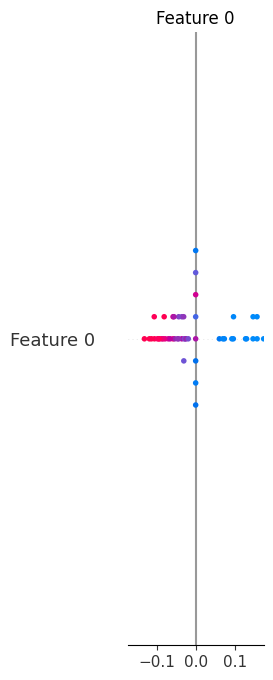

In [54]:
def shap_ffnn(model, X, model_name):
    print(f"Running SHAP for {model_name}...")

    # Small background sample
    background = shap.sample(X, 20)

    # Small sample to explain
    X_explain = X[:50]

    explainer = shap.KernelExplainer(model.predict, background)

    shap_values = explainer.shap_values(X_explain, nsamples=100)

    shap.summary_plot(shap_values, X_explain, show=False)
    # return shap_values

shap_ffnn(ffnn, X_test_nn, "FFNN")


In [30]:
def shap_ffnn(model, X, model_name):
    print(f"Running SHAP for {model_name} (FFNN)...")
    background = X[:200]  # small background sample
    explainer = shap.DeepExplainer(model, background)
    shap_values = explainer.shap_values(X[:200])
    shap.summary_plot(shap_values[0], X[:200], show=False)

shap_ffnn(ffnn, X_test_nn, "FFNN")



Running SHAP for FFNN (FFNN)...


/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(200, 46))']
  warnings.warn(msg)
/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(400, 46))']
  warnings.warn(msg)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

REALLY fast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  5%|▌         | 1/20 [00:00<00:03,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 10%|█         | 2/20 [00:00<00:02,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 15%|█▌        | 3/20 [00:00<00:02,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 20%|██        | 4/20 [00:00<00:02,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 25%|██▌       | 5/20 [00:00<00:02,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 30%|███       | 6/20 [00:00<00:01,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 35%|███▌      | 7/20 [00:00<00:01,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 40%|████      | 8/20 [00:01<00:01,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 45%|████▌     | 9/20 [00:01<00:01,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 50%|█████     | 10/20 [00:01<00:01,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 55%|█████▌    | 11/20 [00:01<00:01,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 60%|██████    | 12/20 [00:01<00:01,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 65%|██████▌   | 13/20 [00:01<00:00,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 70%|███████   | 14/20 [00:01<00:00,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 75%|███████▌  | 15/20 [00:01<00:00,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 80%|████████  | 16/20 [00:02<00:00,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 85%|████████▌ | 17/20 [00:02<00:00,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 90%|█████████ | 18/20 [00:02<00:00,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 95%|█████████▌| 19/20 [00:02<00:00,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


100%|██████████| 20/20 [00:02<00:00,  7.66it/s]


['shap_values_ffnn_encoded.pkl']

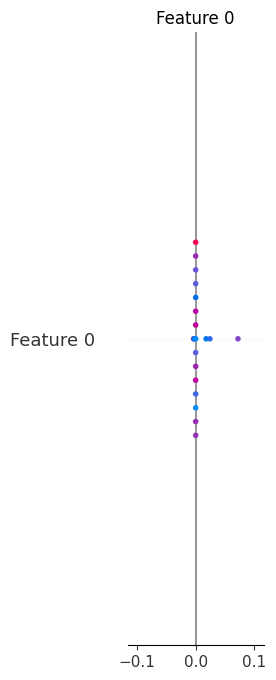

In [50]:
def shap_ffnn_encoded_fast(model, X_encoded, model_name):
    background = shap.sample(X_encoded, 10)
    X_explain = X_encoded[:20]
    explainer = shap.KernelExplainer(model.predict, background)
    shap_values = explainer.shap_values(X_explain, nsamples=50)
    shap.summary_plot(shap_values, X_explain, show=False)
    return shap_values

shap_values_encoded = shap_ffnn_encoded_fast(ffnn_encoded, X_test_encoded, "FFNN_Encoded")
joblib.dump(shap_values_encoded, "shap_values_ffnn_encoded.pkl")



fast

In [ ]:
def shap_ffnn_encoded(model, X_encoded, model_name):
    print(f"Running SHAP for {model_name} (encoded FFNN)...")

    # Use a very small background sample (SHAP's biggest bottleneck)
    background = shap.sample(X_encoded, 20)   # was 200

    # Use far fewer samples for explanation
    X_explain = X_encoded[:50]                # was 200

    explainer = shap.KernelExplainer(model.predict, background)

    # Limit the number of SHAP samples (nsamples=100 is usually enough)
    shap_values = explainer.shap_values(X_explain, nsamples=100)

    shap.summary_plot(shap_values, X_explain, show=False)
    return shap_values



slow

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Running SHAP for FFNN Encoded (encoded FFNN)...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 696us/step


  0%|          | 1/200 [00:14<47:05, 14.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 702us/step


  1%|          | 2/200 [00:27<45:28, 13.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


  2%|▏         | 3/200 [00:41<44:56, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 722us/step


  2%|▏         | 4/200 [00:55<44:56, 13.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 725us/step


  2%|▎         | 5/200 [01:08<44:48, 13.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 691us/step


  3%|▎         | 6/200 [01:22<44:20, 13.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 694us/step


  4%|▎         | 7/200 [01:35<43:43, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 710us/step


  4%|▍         | 8/200 [01:49<43:20, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 710us/step


  4%|▍         | 9/200 [02:02<43:11, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 718us/step


  5%|▌         | 10/200 [02:16<42:59, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 694us/step


  6%|▌         | 11/200 [02:29<42:30, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


  6%|▌         | 12/200 [02:43<42:24, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


  6%|▋         | 13/200 [02:57<42:35, 13.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 727us/step


  7%|▋         | 14/200 [03:11<42:35, 13.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


  8%|▊         | 15/200 [03:24<42:13, 13.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


  8%|▊         | 16/200 [03:38<41:42, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


  8%|▊         | 17/200 [03:51<41:31, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 719us/step


  9%|▉         | 18/200 [04:05<41:20, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 10%|▉         | 19/200 [04:19<41:08, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 692us/step


 10%|█         | 20/200 [04:32<40:46, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 715us/step


 10%|█         | 21/200 [04:46<40:29, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 11%|█         | 22/200 [04:59<40:17, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


 12%|█▏        | 23/200 [05:13<40:09, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 704us/step


 12%|█▏        | 24/200 [05:26<39:44, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 12%|█▎        | 25/200 [05:40<39:24, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 705us/step


 13%|█▎        | 26/200 [05:53<39:12, 13.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 719us/step


 14%|█▎        | 27/200 [06:07<39:14, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 751us/step


 14%|█▍        | 28/200 [06:21<39:32, 13.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 14%|█▍        | 29/200 [06:35<39:08, 13.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 15%|█▌        | 30/200 [06:49<38:38, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 700us/step


 16%|█▌        | 31/200 [07:02<38:17, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 16%|█▌        | 32/200 [07:16<38:13, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


 16%|█▋        | 33/200 [07:29<37:59, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 17%|█▋        | 34/200 [07:43<37:49, 13.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 717us/step


 18%|█▊        | 35/200 [07:57<37:32, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


 18%|█▊        | 36/200 [08:10<37:12, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 706us/step


 18%|█▊        | 37/200 [08:24<36:50, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 695us/step


 19%|█▉        | 38/200 [08:37<36:30, 13.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 704us/step


 20%|█▉        | 39/200 [08:51<36:14, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 700us/step


 20%|██        | 40/200 [09:04<35:54, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 706us/step


 20%|██        | 41/200 [09:17<35:41, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 724us/step


 21%|██        | 42/200 [09:31<35:39, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 22%|██▏       | 43/200 [09:45<35:25, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 22%|██▏       | 44/200 [09:58<35:14, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 697us/step


 22%|██▎       | 45/200 [10:12<34:52, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 23%|██▎       | 46/200 [10:25<34:37, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


 24%|██▎       | 47/200 [10:39<34:22, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 24%|██▍       | 48/200 [10:52<34:11, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 24%|██▍       | 49/200 [11:06<33:58, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 700us/step


 25%|██▌       | 50/200 [11:19<33:39, 13.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 26%|██▌       | 51/200 [11:33<33:27, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step


 26%|██▌       | 52/200 [11:46<33:18, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 26%|██▋       | 53/200 [12:00<33:05, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 702us/step


 27%|██▋       | 54/200 [12:13<32:50, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 28%|██▊       | 55/200 [12:27<32:41, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 721us/step


 28%|██▊       | 56/200 [12:40<32:33, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 719us/step


 28%|██▊       | 57/200 [12:54<32:26, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 704us/step


 29%|██▉       | 58/200 [13:08<32:12, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 30%|██▉       | 59/200 [13:21<31:54, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 706us/step


 30%|███       | 60/200 [13:35<31:33, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 699us/step


 30%|███       | 61/200 [13:48<31:13, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 700us/step


 31%|███       | 62/200 [14:01<30:57, 13.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 32%|███▏      | 63/200 [14:15<30:47, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 710us/step


 32%|███▏      | 64/200 [14:28<30:35, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 720us/step


 32%|███▎      | 65/200 [14:42<30:30, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 33%|███▎      | 66/200 [14:56<30:18, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 700us/step


 34%|███▎      | 67/200 [15:09<29:58, 13.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 710us/step


 34%|███▍      | 68/200 [15:23<29:48, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 34%|███▍      | 69/200 [15:36<29:34, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 35%|███▌      | 70/200 [15:50<29:22, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 36%|███▌      | 71/200 [16:03<29:06, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 36%|███▌      | 72/200 [16:17<28:58, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 699us/step


 36%|███▋      | 73/200 [16:31<28:41, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step


 37%|███▋      | 74/200 [16:44<28:20, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step


 38%|███▊      | 75/200 [16:57<28:03, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 706us/step


 38%|███▊      | 76/200 [17:11<27:46, 13.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


 38%|███▊      | 77/200 [17:24<27:46, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 724us/step


 39%|███▉      | 78/200 [17:38<27:38, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 40%|███▉      | 79/200 [17:52<27:21, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 40%|████      | 80/200 [18:05<27:05, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 702us/step


 40%|████      | 81/200 [18:19<26:52, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 721us/step


 41%|████      | 82/200 [18:32<26:46, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 42%|████▏     | 83/200 [18:46<26:31, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 42%|████▏     | 84/200 [19:00<26:19, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 42%|████▎     | 85/200 [19:13<26:07, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 705us/step


 43%|████▎     | 86/200 [19:27<25:48, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 44%|████▎     | 87/200 [19:40<25:34, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 713us/step


 44%|████▍     | 88/200 [19:54<25:27, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 44%|████▍     | 89/200 [20:08<25:11, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 45%|████▌     | 90/200 [20:21<24:58, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 46%|████▌     | 91/200 [20:35<24:43, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 715us/step


 46%|████▌     | 92/200 [20:49<24:27, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 706us/step


 46%|████▋     | 93/200 [21:02<24:14, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 720us/step


 47%|████▋     | 94/200 [21:16<24:04, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 720us/step


 48%|████▊     | 95/200 [21:30<23:56, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 48%|████▊     | 96/200 [21:43<23:43, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 721us/step


 48%|████▊     | 97/200 [21:57<23:31, 13.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 699us/step


 49%|████▉     | 98/200 [22:10<23:06, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 721us/step


 50%|████▉     | 99/200 [22:24<22:55, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 50%|█████     | 100/200 [22:38<22:43, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 50%|█████     | 101/200 [22:51<22:28, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 51%|█████     | 102/200 [23:05<22:12, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 52%|█████▏    | 103/200 [23:18<21:57, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 721us/step


 52%|█████▏    | 104/200 [23:32<21:44, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 706us/step


 52%|█████▎    | 105/200 [23:45<21:25, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 717us/step


 53%|█████▎    | 106/200 [23:59<21:16, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 54%|█████▎    | 107/200 [24:13<21:04, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


 54%|█████▍    | 108/200 [24:26<20:50, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 695us/step


 55%|█████▍    | 109/200 [24:40<20:28, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 55%|█████▌    | 110/200 [24:53<20:12, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 722us/step


 56%|█████▌    | 111/200 [25:07<20:06, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 740us/step


 56%|█████▌    | 112/200 [25:21<20:04, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 731us/step


 56%|█████▋    | 113/200 [25:35<20:00, 13.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 715us/step


 57%|█████▋    | 114/200 [25:48<19:40, 13.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step


 57%|█████▊    | 115/200 [26:02<19:18, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 713us/step


 58%|█████▊    | 116/200 [26:15<19:03, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 720us/step


 58%|█████▊    | 117/200 [26:29<18:49, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 693us/step


 59%|█████▉    | 118/200 [26:42<18:29, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 60%|█████▉    | 119/200 [26:56<18:17, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 699us/step


 60%|██████    | 120/200 [27:10<18:06, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 750us/step


 60%|██████    | 121/200 [27:24<18:08, 13.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 729us/step


 61%|██████    | 122/200 [27:38<18:00, 13.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 720us/step


 62%|██████▏   | 123/200 [27:52<17:46, 13.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step


 62%|██████▏   | 124/200 [28:05<17:22, 13.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 694us/step


 62%|██████▎   | 125/200 [28:18<16:57, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 63%|██████▎   | 126/200 [28:32<16:44, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 698us/step


 64%|██████▎   | 127/200 [28:46<16:33, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 728us/step


 64%|██████▍   | 128/200 [28:59<16:24, 13.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 722us/step


 64%|██████▍   | 129/200 [29:13<16:11, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 734us/step


 65%|██████▌   | 130/200 [29:27<16:04, 13.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 66%|██████▌   | 131/200 [29:41<15:50, 13.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 66%|██████▌   | 132/200 [29:55<15:34, 13.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 66%|██████▋   | 133/200 [30:08<15:16, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 738us/step


 67%|██████▋   | 134/200 [30:22<15:10, 13.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 693us/step


 68%|██████▊   | 135/200 [30:36<14:48, 13.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 699us/step


 68%|██████▊   | 136/200 [30:49<14:29, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 68%|██████▊   | 137/200 [31:02<14:15, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 704us/step


 69%|██████▉   | 138/200 [31:16<14:01, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


 70%|██████▉   | 139/200 [31:30<13:48, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 699us/step


 70%|███████   | 140/200 [31:43<13:32, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 70%|███████   | 141/200 [31:57<13:20, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


 71%|███████   | 142/200 [32:10<13:07, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 725us/step


 72%|███████▏  | 143/200 [32:24<13:00, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 718us/step


 72%|███████▏  | 144/200 [32:38<12:49, 13.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 737us/step


 72%|███████▎  | 145/200 [32:52<12:41, 13.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 739us/step


 73%|███████▎  | 146/200 [33:06<12:28, 13.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 74%|███████▎  | 147/200 [33:20<12:09, 13.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 74%|███████▍  | 148/200 [33:33<11:53, 13.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 730us/step


 74%|███████▍  | 149/200 [33:47<11:41, 13.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 704us/step


 75%|███████▌  | 150/200 [34:01<11:23, 13.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 704us/step


 76%|███████▌  | 151/200 [34:14<11:08, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 729us/step


 76%|███████▌  | 152/200 [34:28<10:58, 13.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 709us/step


 76%|███████▋  | 153/200 [34:42<10:42, 13.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 694us/step


 77%|███████▋  | 154/200 [34:55<10:24, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 696us/step


 78%|███████▊  | 155/200 [35:08<10:06, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 725us/step


 78%|███████▊  | 156/200 [35:22<09:57, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 727us/step


 78%|███████▊  | 157/200 [35:36<09:46, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 732us/step


 79%|███████▉  | 158/200 [35:50<09:38, 13.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 80%|███████▉  | 159/200 [36:04<09:23, 13.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 80%|████████  | 160/200 [36:17<09:09, 13.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 722us/step


 80%|████████  | 161/200 [36:31<08:56, 13.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step


 81%|████████  | 162/200 [36:45<08:40, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 736us/step


 82%|████████▏ | 163/200 [36:59<08:30, 13.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 715us/step


 82%|████████▏ | 164/200 [37:12<08:15, 13.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 715us/step


 82%|████████▎ | 165/200 [37:26<08:00, 13.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 83%|████████▎ | 166/200 [37:40<07:44, 13.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 713us/step


 84%|████████▎ | 167/200 [37:53<07:29, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 700us/step


 84%|████████▍ | 168/200 [38:06<07:12, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 84%|████████▍ | 169/200 [38:20<07:00, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 702us/step


 85%|████████▌ | 170/200 [38:34<06:46, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


 86%|████████▌ | 171/200 [38:47<06:32, 13.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 722us/step


 86%|████████▌ | 172/200 [39:01<06:21, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 710us/step


 86%|████████▋ | 173/200 [39:14<06:06, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 87%|████████▋ | 174/200 [39:28<05:52, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 727us/step


 88%|████████▊ | 175/200 [39:42<05:41, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 705us/step


 88%|████████▊ | 176/200 [39:55<05:26, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 695us/step


 88%|████████▊ | 177/200 [40:09<05:11, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 699us/step


 89%|████████▉ | 178/200 [40:22<04:56, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 713us/step


 90%|████████▉ | 179/200 [40:36<04:43, 13.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 705us/step


 90%|█████████ | 180/200 [40:49<04:30, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 697us/step


 90%|█████████ | 181/200 [41:02<04:15, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 716us/step


 91%|█████████ | 182/200 [41:16<04:02, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 726us/step


 92%|█████████▏| 183/200 [41:30<03:50, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 714us/step


 92%|█████████▏| 184/200 [41:43<03:37, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 92%|█████████▎| 185/200 [41:57<03:24, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 706us/step


 93%|█████████▎| 186/200 [42:10<03:09, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 692us/step


 94%|█████████▎| 187/200 [42:24<02:55, 13.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 696us/step


 94%|█████████▍| 188/200 [42:37<02:41, 13.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step


 94%|█████████▍| 189/200 [42:50<02:27, 13.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


 95%|█████████▌| 190/200 [43:04<02:13, 13.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


 96%|█████████▌| 191/200 [43:17<02:00, 13.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 711us/step


 96%|█████████▌| 192/200 [43:31<01:47, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 702us/step


 96%|█████████▋| 193/200 [43:44<01:34, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step


 97%|█████████▋| 194/200 [43:58<01:20, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 708us/step


 98%|█████████▊| 195/200 [44:11<01:07, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 707us/step


 98%|█████████▊| 196/200 [44:25<00:54, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 685us/step


 98%|█████████▊| 197/200 [44:38<00:40, 13.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


 99%|█████████▉| 198/200 [44:51<00:26, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 10s 712us/step


100%|█████████▉| 199/200 [45:05<00:13, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 9s 702us/step


100%|██████████| 200/200 [45:18<00:00, 13.59s/it]


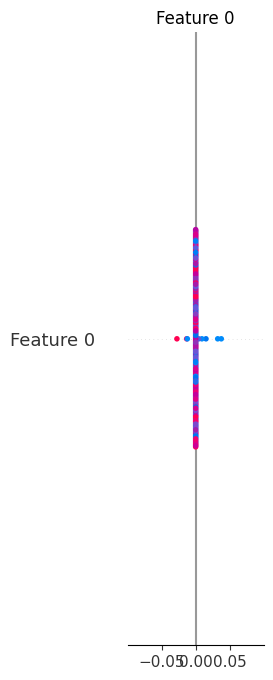

In [31]:
X_test_encoded = encoder.predict(X_test_nn)

def shap_ffnn_encoded(model, X_encoded, model_name):
    print(f"Running SHAP for {model_name} (encoded FFNN)...")
    background = X_encoded[:200]
    explainer = shap.KernelExplainer(model.predict, background)
    shap_values = explainer.shap_values(X_encoded[:200])
    shap.summary_plot(shap_values, X_encoded[:200], show=False)

shap_ffnn_encoded(ffnn_encoded, X_test_encoded, "FFNN Encoded")


In [36]:
shap_values

NameError: name 'shap_values' is not defined

In [ ]:
import joblib

joblib.dump(shap_values, "shap_values_ffnn_encoded.pkl")

# load later:
# shap_values = joblib.load("shap_values_ffnn_encoded.pkl")


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test, is_keras=False):
    if is_keras:
        y_pred_proba = model.predict(X_test).ravel()
        y_pred = (y_pred_proba > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = None

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    return metrics


In [19]:
results = {
    "LogReg": evaluate_model(logreg, X_test, y_test),
    "SVC": evaluate_model(svc, X_test, y_test),
    "DecisionTree": evaluate_model(dt, X_test, y_test),
    "NaiveBayes": evaluate_model(nb, X_test, y_test),
    "XGBoost": evaluate_model(xgb_model, X_test, y_test),
    "FFNN": evaluate_model(ffnn, X_test_nn, y_test_nn, is_keras=True),
    "FFNN_Encoded": evaluate_model(ffnn_encoded, X_test_nn, y_test_nn, is_keras=True)
}


ValueError: Specifying the columns using strings is only supported for dataframes.

In [12]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

results = []

def add_result(name, y_true, y_proba):
    y_pred = (y_proba >= 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    results.append({"model": name, "accuracy": acc, "auc": auc})

# Shallow models
shallow_models = {
    "Logistic Regression": logreg,
    "SVC": svc,
    "Decision Tree": dt,
    "Naive Bayes": nb,
}

for name, model in shallow_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    add_result(name, y_test, y_proba)

# FFNN
y_proba_ffnn = ffnn.predict(X_test).ravel()
add_result("FFNN", y_test, y_proba_ffnn)

# FFNN + AE
y_proba_ffnn_enc = ffnn_encoded.predict(X_test_encoded).ravel()
add_result("FFNN + AE", y_test, y_proba_ffnn_enc)

# XGBoost + AE
if xgb_model is not None:
    y_proba_xgb = xgb_model.predict_proba(X_test_encoded)[:, 1]
    add_result("XGBoost + AE", y_test, y_proba_xgb)

results_df = pd.DataFrame(results).sort_values("auc", ascending=False)
print(results_df)


ValueError: X has 46 features, but ColumnTransformer is expecting 19 features as input.

In [ ]:
import shap

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_encoded)

shap.summary_plot(shap_values_xgb, X_test_encoded)


In [ ]:
explainer_logreg = shap.LinearExplainer(logreg, X_train)
shap_values_logreg = explainer_logreg.shap_values(X_test)

shap.summary_plot(shap_values_logreg, X_test)


In [ ]:
background = X_train[:200]
explainer_ffnn = shap.DeepExplainer(ffnn, background)
shap_values_ffnn = explainer_ffnn.shap_values(X_test[:500])

shap.summary_plot(shap_values_ffnn[0], X_test[:500])


### Error analysis

In [ ]:
y_proba = xgb_model.predict_proba(X_test_encoded)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

df_errors = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "y_proba": y_proba,
})

df_errors["error_type"] = df_errors.apply(
    lambda r: "FN" if r.y_true == 1 and r.y_pred == 0
    else ("FP" if r.y_true == 0 and r.y_pred == 1 else "correct"),
    axis=1,
)

print(df_errors["error_type"].value_counts())
